In [1]:
from keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import time
import itertools 

Using TensorFlow backend.


# 1.Import Dataset

In [2]:
#import the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


# 2.Data Preprocessing

## 2.1StandardScaler

In [0]:
#StandardScaler
def data_flatten(X_dataset):
  X_num, nx, ny = X_dataset.shape
  X_dataset = X_dataset.astype('float64').reshape((X_num,nx*ny))
  return X_dataset
def std_scaler(X_dataset):
    std_scaler = preprocessing.StandardScaler()
    std_scaler.fit(X_dataset)
    return std_scaler
X_train = data_flatten(X_train)
X_test = data_flatten(X_test)
scaler = std_scaler(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2.2PCA

In [0]:
#PCA   
pca = PCA(n_components=256)#set the dimension which contains 95% information
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
X_test = pca.transform(X_test)

# 3 Trained Model

## 3.1Prediction

In [7]:
start = time.time()
model = RandomForestClassifier(n_estimators=125,max_features='sqrt',max_depth=50)
model.fit(X_train,y_train)
end = time.time()
print("the time for training model is {} seconds.".format(str(end-start)))

the time for training model is 204.7517385482788 seconds.


In [8]:
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print("the time for predicting label is {} seconds.".format(str(end-start)))

the time for predicting label is 0.5001544952392578 seconds.


## 3.2 Evaluation

In [0]:
#get confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap='Oranges'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  f = plt.figure()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  

<Figure size 432x288 with 0 Axes>

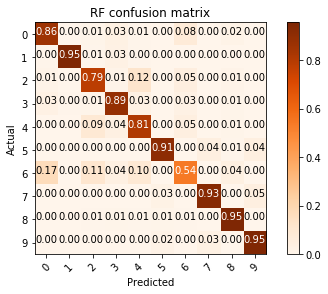

In [0]:
classes = [i for i in range(10)]
cfz_mat = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cfz_mat, classes=classes, normalize=True,
                      title='RF confusion matrix')
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       1.00      0.95      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.85      0.89      0.87      1000
           4       0.75      0.81      0.78      1000
           5       0.94      0.91      0.92      1000
           6       0.72      0.54      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.91      0.95      0.93      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

